## <center>**7.2 tensorboard**</center>

In [2]:
import keras
from keras import layers
from keras.datasets import imdb
from keras_preprocessing import sequence

max_features = 2000
max_len = 500

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)

model = keras.models.Sequential()
model.add(layers.Embedding(max_features, 128, input_length=max_len))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))

model.summary()

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 128)          256000    
                                                                 
 conv1d (Conv1D)             (None, 494, 32)           28704     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 98, 32)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 92, 32)            7200      
                                                                 
 global_max_pooling1d (Globa  (None, 32)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 1)                 3

In [2]:
# !mkdir my_log_dir

In [3]:
import tensorflow as tf
import numpy as np

callback = tf.keras.callbacks.TensorBoard(
        log_dir='my_log_dir',
        histogram_freq=1,
        embeddings_freq=1)


history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=128,
                    validation_split=0.2,
                    callbacks=[callback])

Train on 20000 samples, validate on 5000 samples
Epoch 1/20


D:\ProgramData\Anaconda3\envs\tf\lib\site-packages\keras\engine\training_v1.py:2332: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


20000/20000 [==============================] - ETA: 0s - loss: 0.5708 - acc: 0.7059

ValueError: To visualize embeddings, embeddings_data must be provided.

In [4]:
import tensorflow as tf 
 
# Load and normalize MNIST data 
mnist_data = tf.keras.datasets.mnist 
(X_train, y_train), (X_test, y_test) = mnist_data.load_data() 
X_train, X_test = X_train / 255.0, X_test / 255.0 
 
# Define the model 
model = tf.keras.models.Sequential([ 
tf.keras.layers.Flatten(input_shape=(28, 28)), 
tf.keras.layers.Dense(128, activation='relu'), 
tf.keras.layers.Dropout(0.2), 
tf.keras.layers.Dense(10, activation='softmax') 
]) 
 
# Compile the model 
model.compile( 
optimizer='adam', 
loss='sparse_categorical_crossentropy', 
metrics=['accuracy'])

In [5]:
tf_callback = tf.keras.callbacks.TensorBoard(log_dir="my_log_dir")
model.fit(X_train, y_train, epochs=5, callbacks=[tf_callback])

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 93us/sample - loss: 0.2935 - accuracy: 0.9147
Epoch 2/5
60000/60000 [==============================] - 5s 90us/sample - loss: 0.1425 - accuracy: 0.9578
Epoch 3/5
60000/60000 [==============================] - 5s 91us/sample - loss: 0.1056 - accuracy: 0.9680
Epoch 4/5
60000/60000 [==============================] - 5s 91us/sample - loss: 0.0855 - accuracy: 0.9740
Epoch 5/5
60000/60000 [==============================] - 5s 91us/sample - loss: 0.0756 - accuracy: 0.9767


In [ ]:
!tensorboard --logdir=my_log_dir

In [16]:
!pip install pydot==1.1.0

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [9 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\zhuqin\AppData\Local\Temp\pip-install-hgxzn_yc\pydot_aaf92dd746b44a679e69473d8b4a11cd\setup.py", line 6, in <module>
      import pydot
    File "C:\Users\zhuqin\AppData\Local\Temp\pip-install-hgxzn_yc\pydot_aaf92dd746b44a679e69473d8b4a11cd\pydot.py", line 32
      except Exception, e:
                      ^
  SyntaxError: invalid syntax
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

Encountered error while generating package metadata.

See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


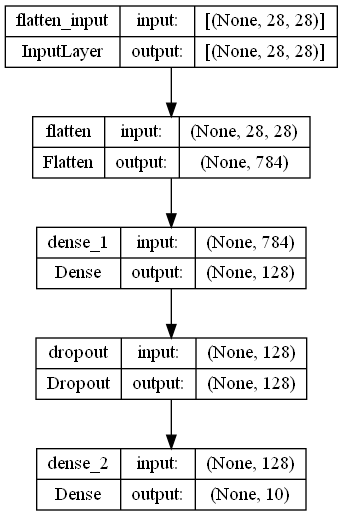

In [7]:
# # from keras.utils import plot_model
from keras.utils.vis_utils import plot_model

plot_model(model, show_shapes=True, to_file='model.png')

# from keras.utils.vis_utils import plot_model
# plot_model(model, show_shapes=True)

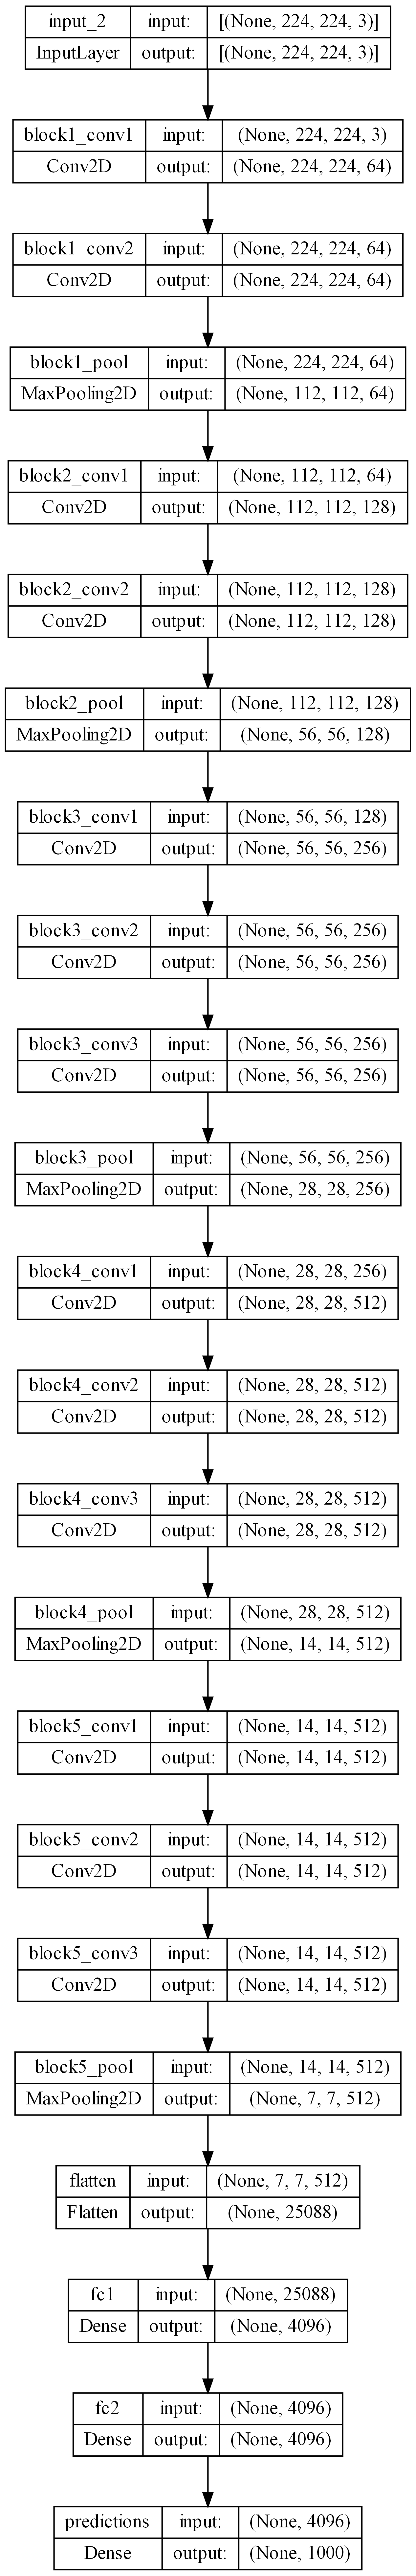

In [8]:
from keras.applications import VGG16
from keras.utils import plot_model
from IPython.display import Image
conv_base=VGG16(weights='imagenet',
                include_top=True)
# conv_base.summary()
plot_model(conv_base,show_shapes=True,to_file='VGG16.png', dpi=300)
# Image(filename='VGG16.png')